### Блок теоретических вопросов

*В практической части задания мы сравнили распределения выходов решающей функции (оценка вероятности) SVM и LogReg. Обычно у гистограммы для LogReg хвосты тяжелее, чем у гистограммы для SVM. С чем это может быть связано?*: 

1. Это никак нельзя объяснить, просто эмпирический факт.
2. Дело в функционалах, на которые обучаются модели. SVM достаточно сделать отступ равным 1, в том время как LogReg максимизирует отступ
3. Потому что SVM плохо оценивает вероятности, а LogReg - хорошо



**Ответ: 2)** пояснение в самом ответе

_______________________________________________________

*Выберите верное утверждение о SVM и Logreg*: 

1.	Откалиброванный SVM всегда оценивает вероятности лучше, чем LogReg
2.	У SVM в среднем будет немного более высокая accuracy, чем у LogReg
3.	Нельзя сказать, что будет лучше по какой-либо метрике. Просто одна модель оценивает вероятность, а другая - нет
4.	SVM обучается быстрее, чем LogReg




**Ответ: 2)** Из-за того, что LogReg максимизирует свою уверенность (старается корректно оценивать вероятности), ему может быть выгодно ошибаться на объектах, близких к разделяющей гиперплоскости. Он как бы более склонен подстраиваться под "далекие" объекты в признаковом пространств.

_______________________________________________________

*Пусть у нас есть выборка из 10 объектов и 5 признаков. Обучаем SVM в общем виде. Сколько обучаемых параметров будет у модели?*: 

1.	11
2.	5
3.	50
4.	16





**Ответ: 4)** Параметр регуляризации $\lambda$, 10 параметров $\xi_i$ для каждого объекта (регулируют отступ по объекту от плоскости) и сами 5 признаков (и соотвествующие им коэффициенты $\beta_j$), описывающих гиперплоскость.

_______________________________________________________

### Блок практики

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('processed_train.csv')
data.head()

,EngineVersion,AppVersion,AvSigVersion,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,...,Platform_windows8,Processor_x64,Processor_x86,Census_DeviceFamily_Windows.Server,Census_OSArchitecture_arm64,Census_OSArchitecture_x86,Census_GenuineStateName_IS_GENUINE,Census_GenuineStateName_OFFLINE,Census_GenuineStateName_UNKNOWN,HasDetections
0,0.552153,0.530941,0.587952,7.0,0,53447.0,1.0,1.0,1,29,...,0,1,0,0,0,0,1,0,0,0
1,0.448751,0.528931,0.484434,7.0,0,53447.0,1.0,1.0,1,93,...,0,1,0,0,0,0,0,1,0,0
2,0.552153,0.530941,0.557522,7.0,0,53447.0,1.0,1.0,1,86,...,0,1,0,0,0,0,1,0,0,0
3,0.552153,0.530941,0.482759,7.0,0,53447.0,1.0,1.0,1,97,...,0,1,0,0,0,0,1,0,0,0
4,0.493175,0.530941,0.505721,7.0,0,53447.0,1.0,1.0,1,164,...,0,1,0,0,0,0,1,0,0,0


Разобьем выборку на тест и трейн

In [3]:
from sklearn.model_selection import train_test_split

X = data.drop('HasDetections', axis=1)
y = data['HasDetections']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33)

Обучите LogReg и SVM с помощью классов `LogisticRegression` и `LinearSVC`. Добавьте шаг стандартизации данных в пайплайны. Для разнообразия, возьмем `MinMaxScaler`. Пайплайны запишем в переменные `pipe_lr` и `pipe_svm` соответственно!

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler

pipe_lr = Pipeline([('lr_scaler', MinMaxScaler()), 
                    ('lr_estimator', LogisticRegression())])

pipe_svm = Pipeline([('lr_scaler', MinMaxScaler()), 
                    ('svm_estimator', LinearSVC())])

Постройте ROC для обеих моделей, посчитайте AUC. Конечно же, обучение проводите на трейне, а замеры - на тесте.

Заметьте! Классическая реализация `SVM`, как и в лекциях, не дает никакой оценки вероятности. Чтобы трансформировать выходы в вероятности, на практике мы использовали функцию-сигмоиду. Здесь предлагаем Вам трансформировать выходы `decision_function` в вероятности пропорциональным способом.

Например, вы обучили `SVM`, и на тестовых данных модель выдала следующие выходы `decision_function`:

(-10, -5, 0, +2, +10, +15)

Для каждого числа необходимо сделать преобразование в выражение вида `P(y = +1 | x)`.

С одной стороны, отрицательный знак числа будет сигнализировать нам о том, что `P(y = +1 | x) < 0.5`.

Тогда положительный о том, что `P(y = +1 | x) > 0.5`. 

С другой стороны, для тех объектов, в которых модель уверена больше всего, положим краевые вероятности. Для примера выше:

`P(y = +1 | -10) = 0`, `P(y = +1 | +15) = 1`. Для всех промежуточных объектов применим пропорциональное преобразование. Например:

$$
P(y = +1 | -5) = \frac{|-5|}{|-10|} \cdot 0.5
$$

$$
P(y = +1 | +2) = \frac{|+2|}{|+15|} \cdot 0.5 + 0.5
$$

In [5]:
### Обучаем модели на трейне

pipe_lr.fit(X_train, y_train)
pipe_svm.fit(X_train, y_train)

Pipeline(steps=[('lr_scaler', MinMaxScaler()), ('svm_estimator', LinearSVC())])

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

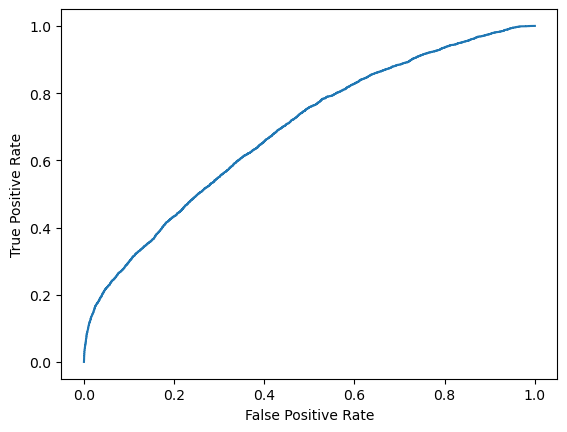

In [7]:
### С изображением рок-кривой для ЛогРега не будет проблем:

preds_lr = pipe_lr.predict_proba(X_test)[:, 1]

fpr1, tpr1, _ = roc_curve(y_test, preds_lr)
roc_display1 = RocCurveDisplay(fpr=fpr1, tpr=tpr1).plot()

In [8]:
### А для того, чтобы построить и изобразить рок-кривую для SVM, придется
### в начале преобразовать выходы pipe_svm.decision_function

decision_preds = pipe_svm.decision_function(X_test)

min_pred = min(decision_preds)
max_pred = max(decision_preds)


preds_svm = [-abs(x-min_pred)/min_pred*0.5 
             if x <= 0 
             else abs(x/max_pred)*0.5+0.5 
             for x in decision_preds]

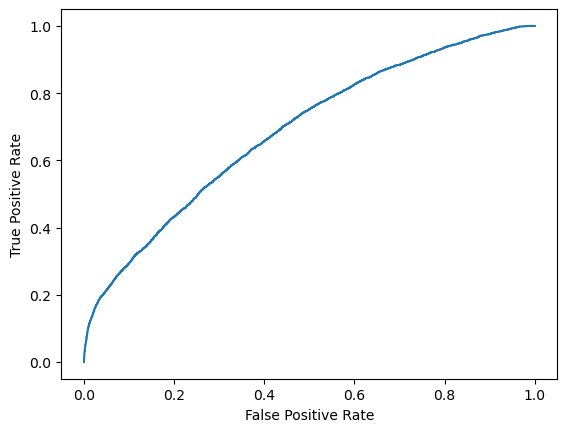

In [9]:
fpr2, tpr2, _ = roc_curve(y_test, preds_svm)
roc_display2 = RocCurveDisplay(fpr=fpr2, tpr=tpr2).plot()

In [10]:
from sklearn.metrics import auc 

print('LogReg auc =', auc(fpr1, tpr1))
print('SVM auc =', auc(fpr2, tpr2))

LogReg auc = 0.689056400232108
SVM auc = 0.6877919714668632


Постройте калибровочные кривые для обеих моделей. Методом from_estimator для svm воспользоваться не получится.

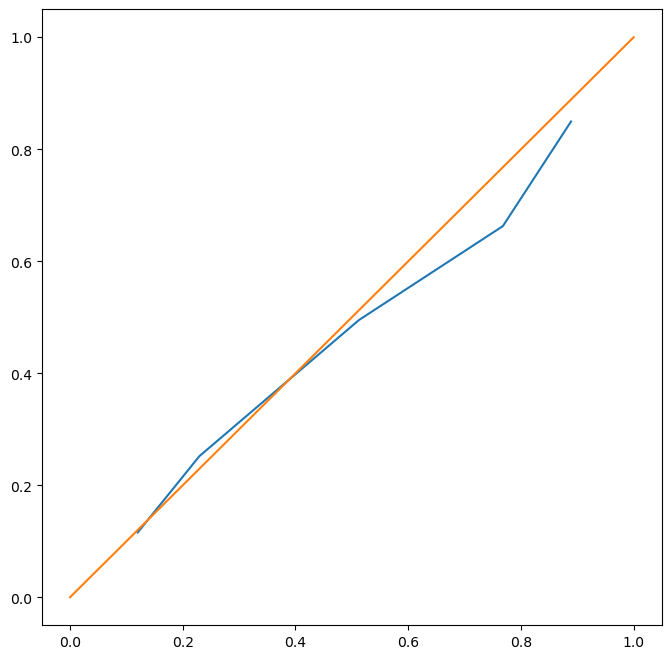

In [11]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


prob_true_lr, prob_pred_lr = calibration_curve(y_test,
                                               preds_lr,
                                               n_bins=5)


fig = plt.figure()
fig.set_size_inches(8, 8)

plt.plot(prob_true_lr, prob_pred_lr)
plt.plot(np.linspace(0, 1, 5), np.linspace(0, 1, 5))

plt.show()

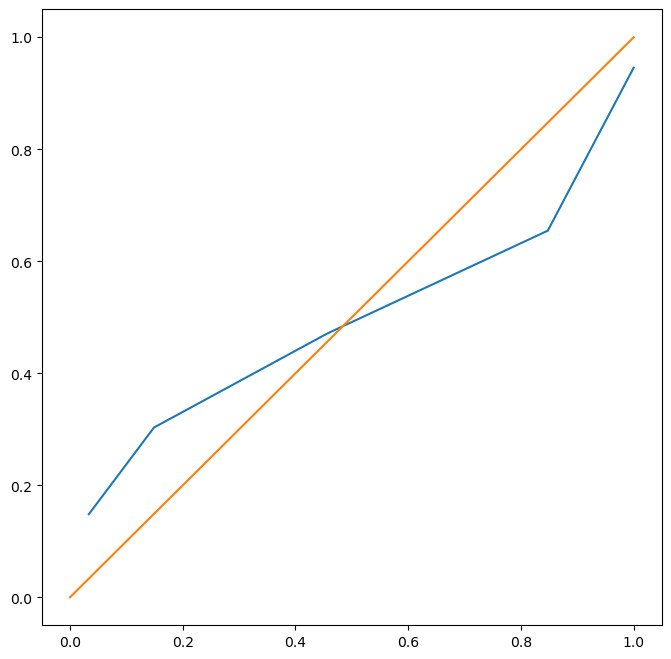

In [12]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve


prob_true_svm, prob_pred_svm = calibration_curve(y_test,
                                               preds_svm,
                                               n_bins=5)


fig = plt.figure()
fig.set_size_inches(8, 8)

plt.plot(prob_true_svm, prob_pred_svm)
plt.plot(np.linspace(0, 1, 5), np.linspace(0, 1, 5))

plt.show()

Какая калибровочная кривая ближе к диагонали? Откалибруйте SVM способом как в практике и изобразите новую кривую!

-- *Конечно же, кривая LR*

In [13]:
### Калибровка

from sklearn.calibration import CalibratedClassifierCV

plats_calibration = CalibratedClassifierCV(pipe_svm,
                                           cv=3,
                                           method='sigmoid').fit(X_train, y_train)

plats_calibration_preds = plats_calibration.predict_proba(X_test)[:, 1]

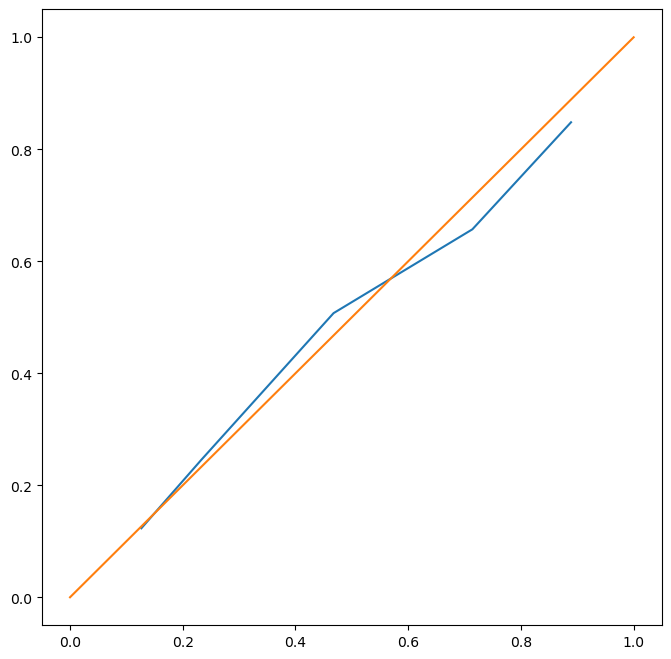

In [14]:
### Новая кривая

prob_true_svm, prob_pred_svm = calibration_curve(y_test,
                                                 plats_calibration_preds,
                                                 n_bins=5)


fig = plt.figure()
fig.set_size_inches(8, 8)

plt.plot(prob_true_svm, prob_pred_svm)
plt.plot(np.linspace(0, 1, 5), np.linspace(0, 1, 5))

plt.show()